In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [12]:
df_week = pd.read_csv("SAP_weekly_return_volatility.csv")
df_week.head(5)

,Year,Week_Number,mean_return,volatility,label
0,2019,0,-0.1050,3.594650,0
1,2019,1,0.6532,1.153409,1
2,2019,2,0.7326,1.198802,1
3,2019,3,0.0735,1.593999,0
4,2019,4,-0.3746,2.056743,0


In [13]:
df_daily = pd.read_csv("SAP_weekly_return_volatility_detailed.csv")
df_daily.head(5)

,High,Low,Open,Close,Volume,Adj Close,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility
0,99.559998,98.339996,98.570000,99.180000,506300.0,94.896118,0.000,2019-01-02,0,2019,2,Wednesday,-0.1050,3.594650
1,96.830002,95.449997,96.730003,95.459999,807800.0,91.336800,-3.751,2019-01-03,0,2019,3,Thursday,-0.1050,3.594650
2,99.199997,96.910004,97.339996,98.739998,1038100.0,94.475128,3.436,2019-01-04,0,2019,4,Friday,-0.1050,3.594650
3,100.190002,98.760002,99.440002,99.709999,861600.0,95.403229,0.982,2019-01-07,1,2019,7,Monday,0.6532,1.153409
4,101.480003,100.430000,101.370003,101.269997,548600.0,96.895844,1.565,2019-01-08,1,2019,8,Tuesday,0.6532,1.153409


In [14]:
df_week_2019 = df_week[df_week["Year"] == 2019].reset_index(drop = True)
df_week_2020 = df_week[df_week["Year"] == 2020].reset_index(drop = True)

### 1. take k = 3 and use k-means sklearn library routing for k- means (random initialization and use the defaults). Take k = 1,2,...7,8 and compute the distortion vs. k. Use the ”knee” method to find out the best k.

In [16]:
x_19 = df_week_2019[["mean_return","volatility"]].values
inertia_list = list()

for k in range(1,9):
    kmeans = KMeans(n_clusters = k)
    y_kmeans = kmeans.fit_predict(x_19)
    inertia_19 = kmeans.inertia_
    inertia_list.append(inertia_19)
    

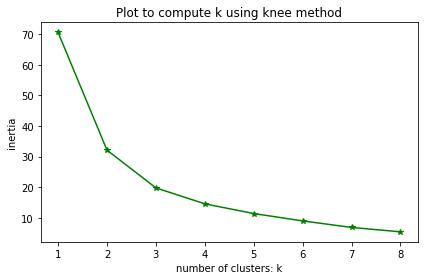

In [17]:
plt.plot(range(1,9), inertia_list, marker = "*", color = "green")
plt.title("Plot to compute k using knee method")
plt.xlabel("number of clusters: k")
plt.ylabel("inertia")
plt.tight_layout()
plt.show()

From above plot we can see after k = 3 there is linear decline in the inertia's value. so we will choose k = 4 as our optimal value for further analysis.

### 2. for this optimal k, examine your clusters and for each cluster compute the percentage of ”green” and ”red” weeks in that cluster.

In [18]:
x_20 = df_week_2020[["mean_return","volatility"]].values

kmeans_20 = KMeans(n_clusters = 3)
cluster_predict = kmeans_20.fit_predict(x_20)
df_week_2020["cluster"] = cluster_predict
df_week_2020.head(5)

,Year,Week_Number,mean_return,volatility,label,cluster
0,2020,0,0.01800,2.951464,0,0
1,2020,1,0.44680,0.825564,1,0
2,2020,2,0.43660,1.142404,1,0
3,2020,3,-0.15925,0.706630,1,0
4,2020,4,-1.21700,1.127360,0,0


In [19]:
pd.crosstab(df_week_2020["label"],df_week_2020["cluster"])\
.apply(lambda x: round((x * 100) / x.sum(),2))

cluster,0,1,2
label,,,
0,61.7,100.0,33.33
1,38.3,0.0,66.67


#### Above we can see all the percentage for each cluster for green(1) and red(0) labels.

### 3. does your k-means clustering find any ”pure” clusters (percent of red or green weeks in a cluster is more than, say, 90% of all weeks in that cluster)?

* Cluster 1 is pure cluster with 100% Red(0) labels in it.